<a href="https://colab.research.google.com/github/Iztund/CODSOFT/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the necessary liberies for cleaning,data preprocessing,visualization e.t.c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#getting the dataset from my github repository and showing the first 5 entries
df = pd.read_csv('https://github.com/Iztund/CODSOFT/raw/refs/heads/main/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **FEATURE ENGINEERING**

In [4]:
# Checking the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Summarizing the statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#getting the total number of missing entries
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
#getting the median and the mean values of the age
med = df['Age'].median()
mea = df['Age'].mean()

In [8]:
#Creating a function to get the ages less than 14
def addage():
  new=np.array([])
  for age_val in df['Age']:
    if age_val < 14 :
      new = np.append(new, age_val)
  return np.mean(new)

In [9]:
"""asigning values to the Ages column that has no value,
 the median,mean, and the mean of ages less than 14"""

for index in df.index:
    if df.loc[index, 'Survived'] == 1 and df.loc[index, 'Sex'] == 'male' :
        # Check if the age value is NaN before filling
        if pd.isnull(df.loc[index, 'Age']):
            df.loc[index, 'Age'] = med  # Assign 'med' if NaN
    elif df.loc[index, 'Survived'] == 1 and df.loc[index, 'Sex'] == 'female':
        if pd.isnull(df.loc[index, 'Age']):
            df.loc[index, 'Age'] = mea  # Assign 'med' if NaN
    elif df.loc[index, 'Survived'] == 0 and df.loc[index, 'Sex'] == 'male':
      if pd.isnull(df.loc[index, 'Age']):
            df.loc[index, 'Age'] = med  # Assign 'med' if NaN

    else:
      if pd.isnull(df.loc[index, 'Age']):
            df.loc[index, 'Age'] = addage()  # Assign 'med' if NaN


In [10]:
# Filling the 2 missing values in 'Embarked' with the most common value (mode)
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
# Dropping the 'Cabin' column due to too much missing values
if 'Cabin' in df.columns:
    df.drop(columns='Cabin', inplace=True)

In [12]:
# Getting the new missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
# redescribing the statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.991447,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.438883,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
"""Defining the custom function to take the percentage of the survived and not survived
and the whole column"""
def func(pct, allvalues):
    absolute = int(round(pct / 100.0 *sum( allvalues)))
    return "{:.1f}%\n({})".format(pct, absolute)

<Figure size 1000x700 with 0 Axes>

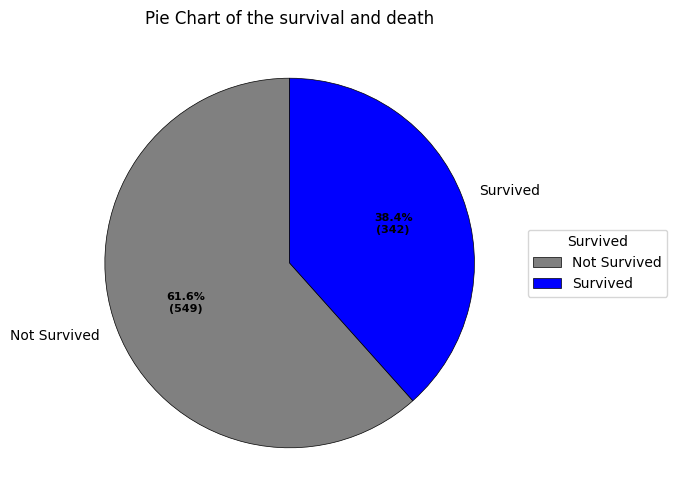

In [15]:
# Calculate value counts
value_counts = df['Survived'].value_counts()
# Creating plot
fig = plt.figure(figsize=(10, 7))
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(df['Survived'].value_counts(),
        labels=['Not Survived', 'Survived'],
        autopct=lambda pct: func(pct, df['Survived'].value_counts()),
        textprops=dict(color="black"),
        colors=['grey', 'blue'],
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},startangle=90)

# Add a title
ax.set_title("Pie Chart of the survival and death")

# Add legend
ax.legend(wedges, ['Not Survived', 'Survived'],
          title="Survived",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
plt.show()
# show plot
plt.show()

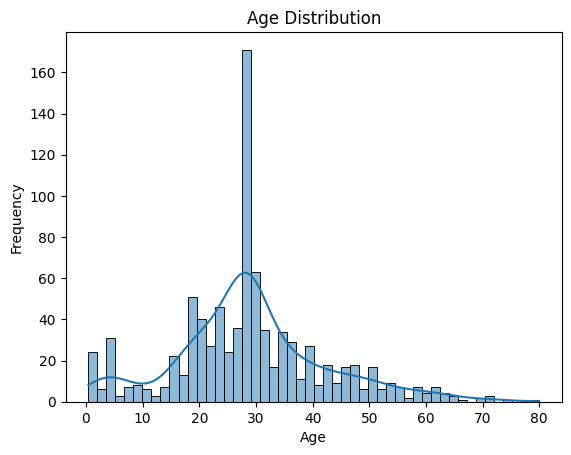

In [16]:
# Visualize the distribution of Age
sns.histplot(df['Age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

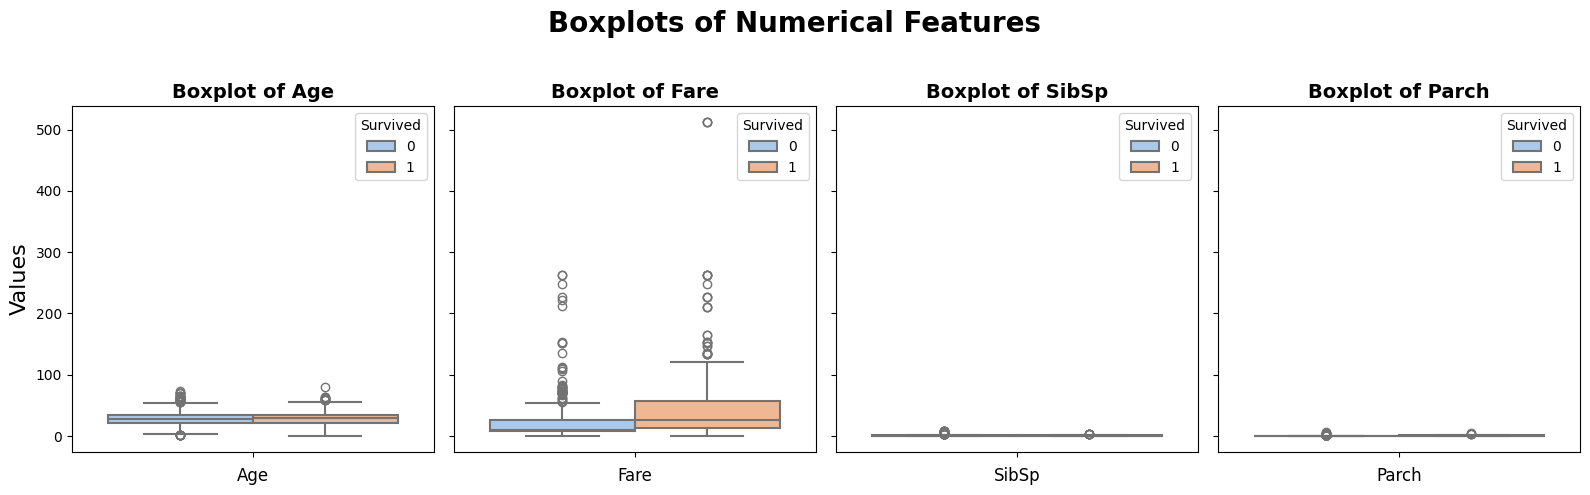

In [37]:
# Select numerical features for outlier detection
num_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Create a figure with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=len(num_columns), figsize=(16, 5), sharey=True)

for i, col in enumerate(num_columns):
    sns.boxplot(y=df[col], ax=axes[i], palette="pastel", linewidth=1.5, hue= df['Survived'], legend=True)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Values", fontsize=16)  # Add the y-axis label for each plot

# Add a title for the entire figure
fig.suptitle("Boxplots of Numerical Features", fontsize=20, weight='bold')

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit titles and labels
plt.show()


In [38]:
# Encode categorical variables for correlation calculation
# Converting 'Sex' and 'Embarked' into numeric values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [39]:
# Compute the correlation matrix for numerical features only
df_cor = df.select_dtypes(include=np.number).columns # Select only numerical features
correlation_matrix = df[df_cor].corr()

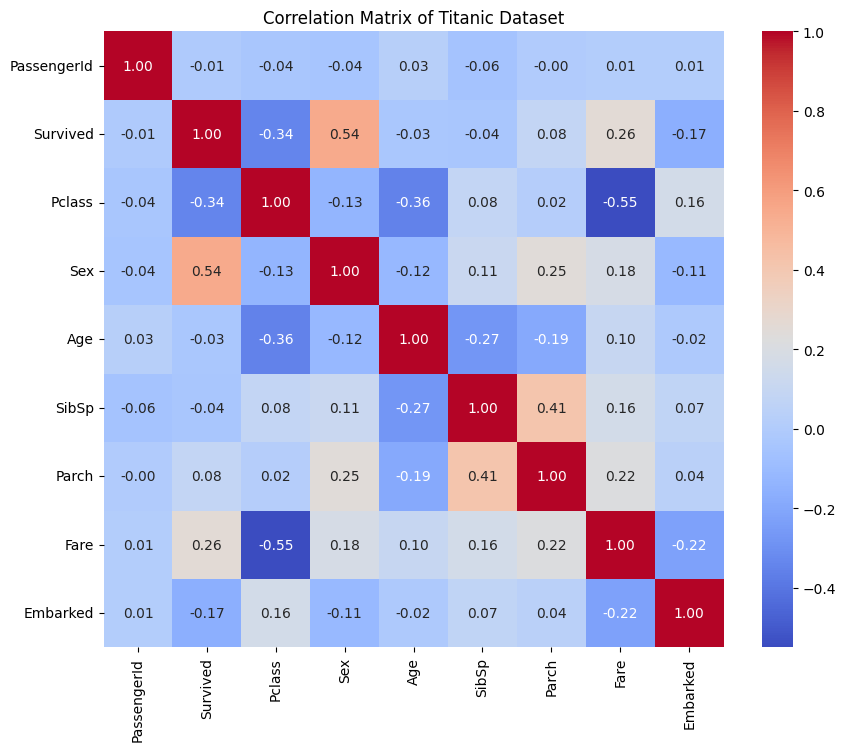

In [40]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

In [41]:
# Drop irrelevant features
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [42]:
# Getting information about the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# **MODEL BUILD AND EVALUATION**

In [43]:
#importing the necessary liberies for building the model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [44]:
# Separating the features and the label(target)
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
# Initialize the model
ranfor_cla_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
ranfor_cla_model.fit(X_train, y_train)
# Making predictions
y_predicted = ranfor_cla_model.predict(X_test)

In [46]:
# Evaluate the accuracy of RandomForestClassifier model
accuracy_ranfor = accuracy_score(y_test, y_predicted)
print("The Accuracy of RandomForestClassifier is ", f"{accuracy_ranfor:.2f}")

The Accuracy of RandomForestClassifier is  0.83


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



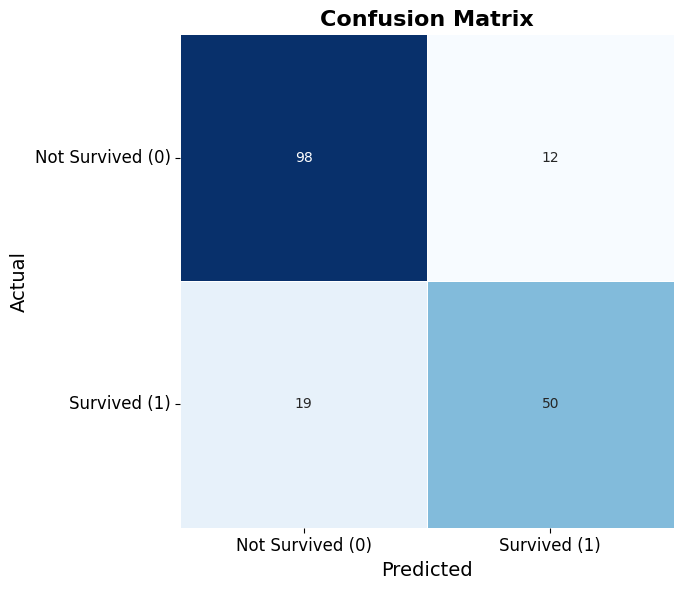

In [47]:
# Evaluate the Random Forest model's performance

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_predicted))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted)

# Displaying Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, square=True)
plt.title("Confusion Matrix", fontsize=16, weight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Survived (0)", "Survived (1)"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Survived (0)", "Survived (1)"], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [48]:
# Examine which features were most important
feature_importances = pd.DataFrame({'Feature': X.columns,
                                    'Importance': ranfor_cla_model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))


    Feature  Importance
2       Age    0.267747
5      Fare    0.260407
1       Sex    0.257735
0    Pclass    0.092014
3     SibSp    0.048715
4     Parch    0.040476
6  Embarked    0.032906


In [49]:
# making prediction
#creating a function to get the correct input data type
def get_user_input(prompt, data_type):
    """
    Helper function to get validated user input of the specific data type.
    """
    while True:
        try:
            value = data_type(input(prompt))
            return value
        except ValueError:
            print(f"Invalid input. Please enter a valid {data_type.__name__}.")
# Collecting inputs from the user
try:
    Age = get_user_input("Enter the Age (float): ", float)
    Fare = get_user_input("Enter the Fare (float): ", float)
    Pclass = get_user_input("Enter the Pclass (1, 2, or 3): ", int)
    Sex = get_user_input("Enter the Sex (0 for male, 1 for female): ", int)
    SibSp = get_user_input("Enter the SibSp (integer): ", int)
    Parch = get_user_input("Enter the Parch (integer): ", int)
    Embarked = get_user_input("Enter the Embarked (0=C, 1=Q, 2=S): ", int)

    def predict():
      encoded_text = [Age, Fare, Pclass, Sex, SibSp, Parch, Embarked]
      pred = np.zeros((1,7))
      pred[0] = encoded_text
      result = ranfor_cla_model.predict(pred)
      m=float(result[0])
      if m>=0.5:
        print("So happy!!! this person probably survived")
      else:
        print("sorry!!! this person probably didn't survived")

    predict()
except Exception as e:
    print(f"An error occurred: {e}")



Enter the Age (float): 25
Enter the Fare (float): 13
Enter the Pclass (1, 2, or 3): 2
Enter the Sex (0 for male, 1 for female): 0
Enter the SibSp (integer): 0
Enter the Parch (integer): 0
Enter the Embarked (0=C, 1=Q, 2=S): 2
sorry!!! this person probably didn't survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
